# Augmentatation

- Flingping : 자유반전
- Gray scale :  흑백, 또는 다른.. 색채널
- saturation : 색조(hue), 채도(saturation),명도(value)
- Brightness : 밝기
- Rotation 회전
- Center Crop

## tensorflow를 사용한 img augmentation

### library install

In [1]:
!pip install pillow

In [7]:
# 야옹이 이미지 다운
!wget https://aiffelstaticprd.blob.core.windows.net/media/documents/mycat.jpg

--2020-10-17 15:34:54--  https://aiffelstaticprd.blob.core.windows.net/media/documents/mycat.jpg
Resolving aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)... 52.239.148.4
접속 aiffelstaticprd.blob.core.windows.net (aiffelstaticprd.blob.core.windows.net)|52.239.148.4|:443... 접속됨.
HTTP request sent, awaiting response... 200 OK
Length: 166695 (163K) [image/jpeg]
Saving to: ‘mycat.jpg.5’

mycat.jpg.5         100%[===================>] 162.79K  --.-KB/s    in 0.03s   

2020-10-17 15:34:54 (5.37 MB/s) - ‘mycat.jpg.5’ saved [166695/166695]



### library import

In [1]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os



### img import

In [2]:
sample_img_path = os.getenv('HOME')+'/aiffel/AIFFEL_LSG/lms/03-GoingDeeper/02-agumentation/mycat.jpg'
sample_img_path

'/home/aiffel0042/aiffel/AIFFEL_LSG/lms/03-GoingDeeper/02-agumentation/mycat.jpg'

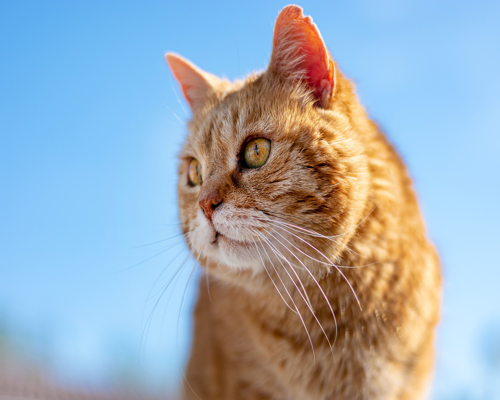

In [3]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

### img flip

In [4]:
flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(15, 15))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

InternalError: CUDA runtime implicit initialization on GPU:0 failed. Status: out of memory

### centor crop

In [1]:
plt.figure(figsize=(15, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

NameError: name 'plt' is not defined

In [2]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor

In [3]:
plt.figure(figsize=(15, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

NameError: name 'plt' is not defined